In [34]:
#importing libraries to read dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from sklearn import dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [35]:
#Reading the excel dataset
df_heart=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


**2.Exploratory Data Analysis(EDA)**

In [36]:
#checking the shape of the dataset
df_heart.shape

(908, 13)

In [37]:
#finding more info from dataset
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [38]:
#more description from  the dataset
df_heart.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [39]:
#checking for null or missing values in dataset
df_heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [40]:
#Handling the missing or null values in dataset by imputation technique
df_heart.fillna(df_heart['oldpeak'].mean(), inplace=True)

In [41]:
#checking for duplicated values in dataset
df_heart.duplicated().sum()

np.int64(1)

In [42]:
#Droping the duplicated values from the dataset
df_heart.drop_duplicates(inplace=True)

In [43]:
def find_and_drop_outliers_iqr(df_heart):

    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df_heart.copy()

    for col in df_cleaned.select_dtypes(include=np.number):
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to keep only rows within the bounds
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

# Call the function to find and drop outliers
df_heart_no_outliers = find_and_drop_outliers_iqr(df_heart)

# Verify the shape of the new DataFrame to see how many rows were removed
print("Shape of original DataFrame:", df_heart.shape)
print("Shape of DataFrame without outliers:", df_heart_no_outliers.shape)

Shape of original DataFrame: (907, 13)
Shape of DataFrame without outliers: (617, 13)


**Visualizations**

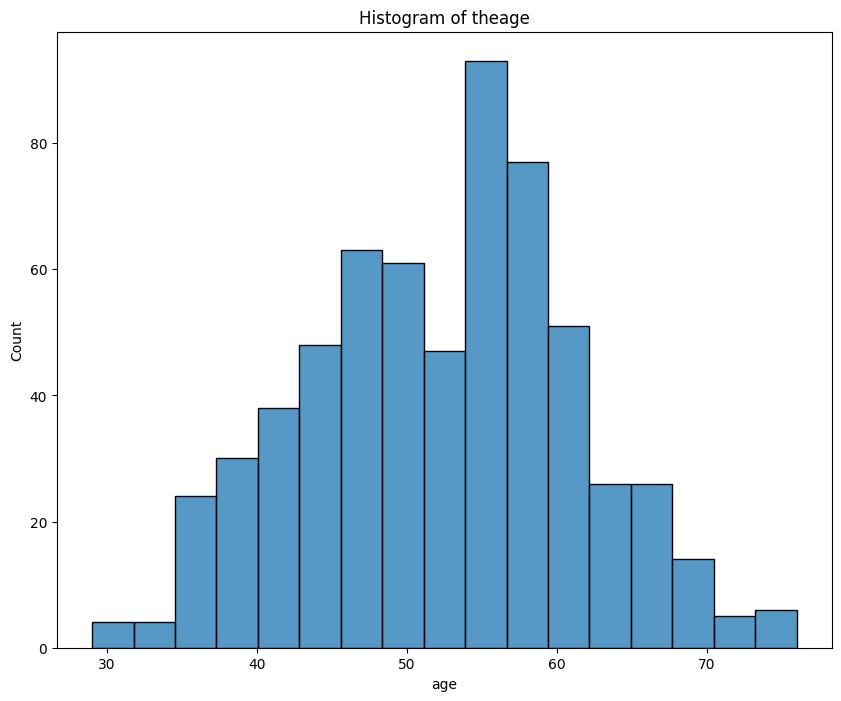

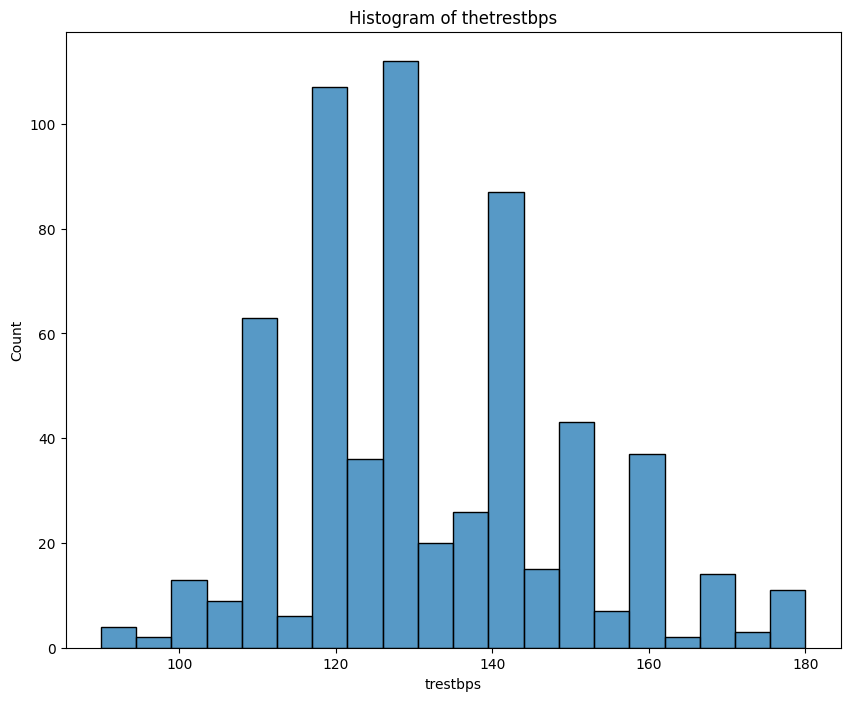

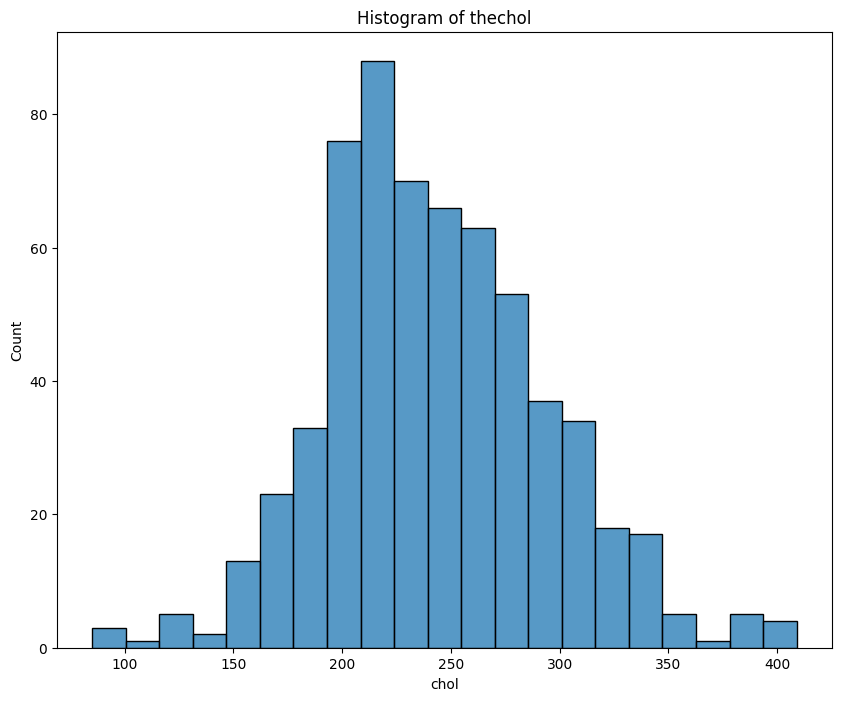

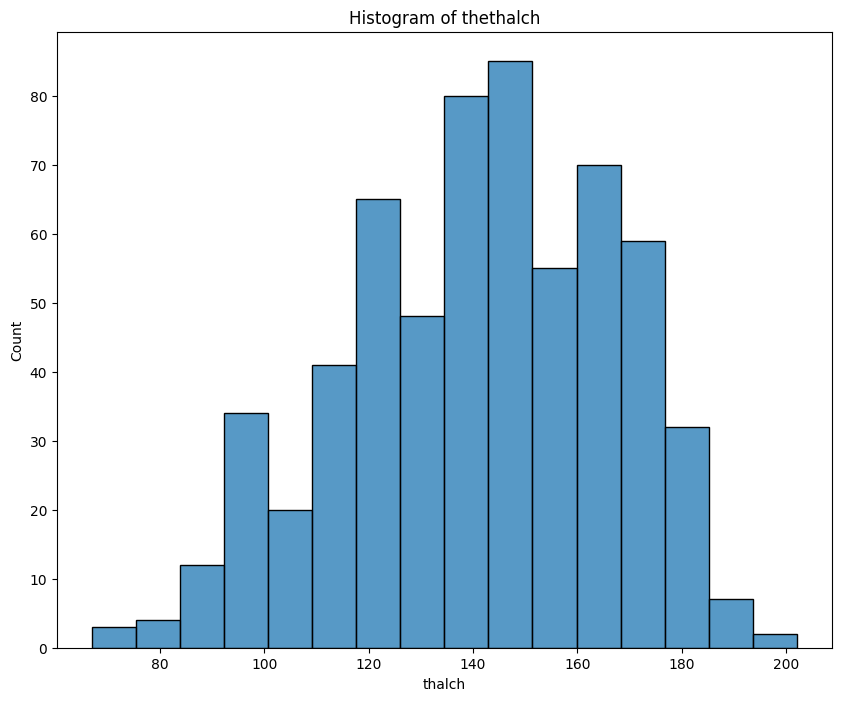

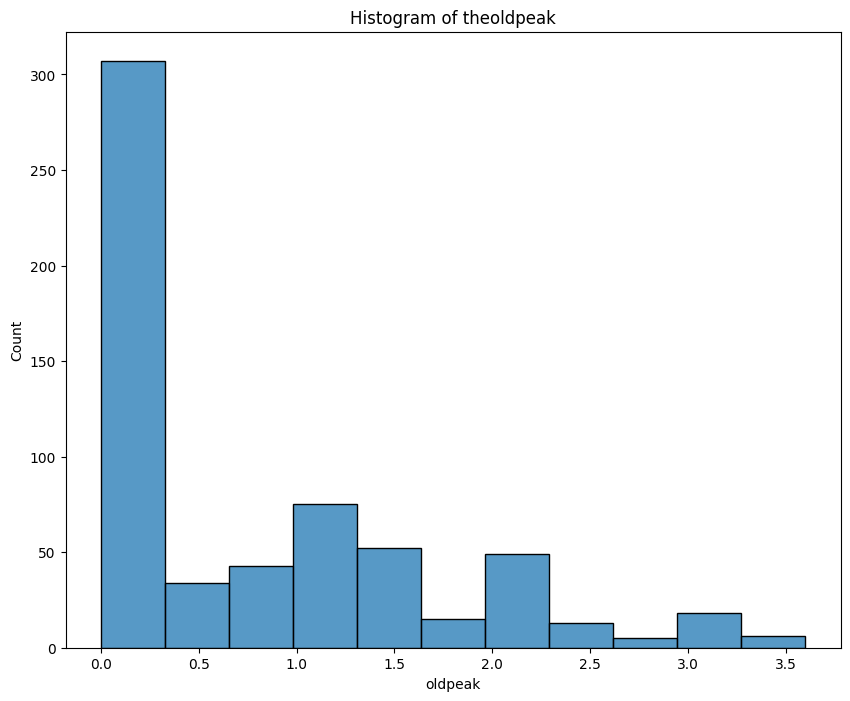

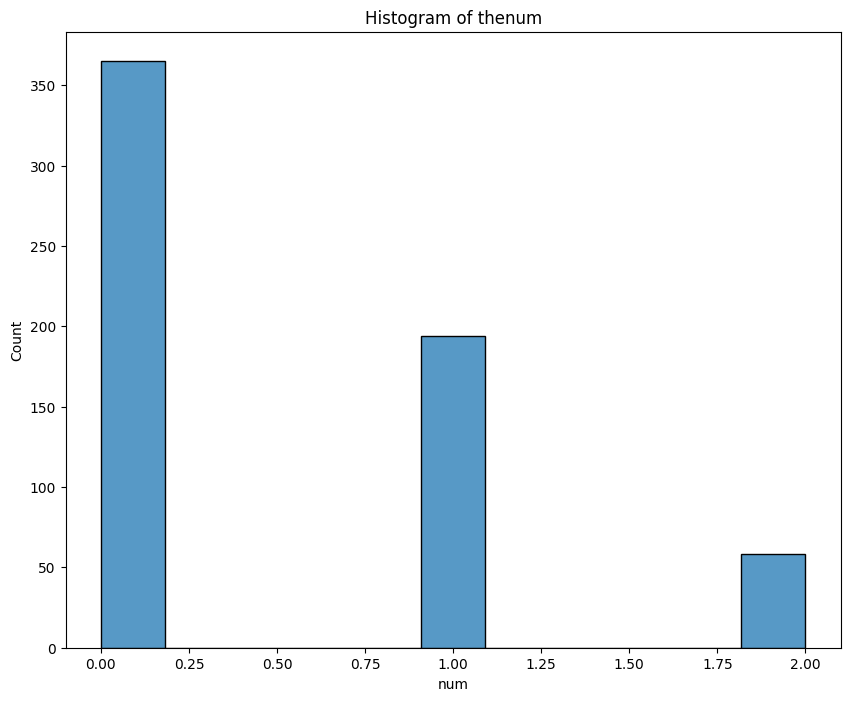

In [44]:
#visualization of the histogarm for given dataset
import numpy as np
for col in df_heart_no_outliers.select_dtypes(include=np.number):
  plt.figure(figsize=(10,8))
  plt.title("Histogram of the"+ col)
  plt.xlabel="Frequency"
  plt.ylabel="values"
  sns.histplot(df_heart_no_outliers[col])
  plt.show()

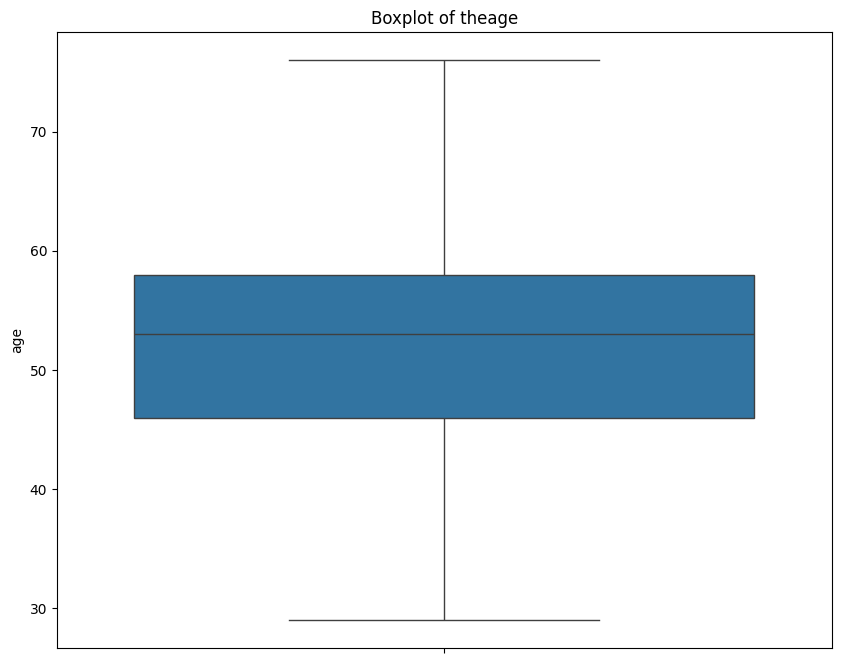

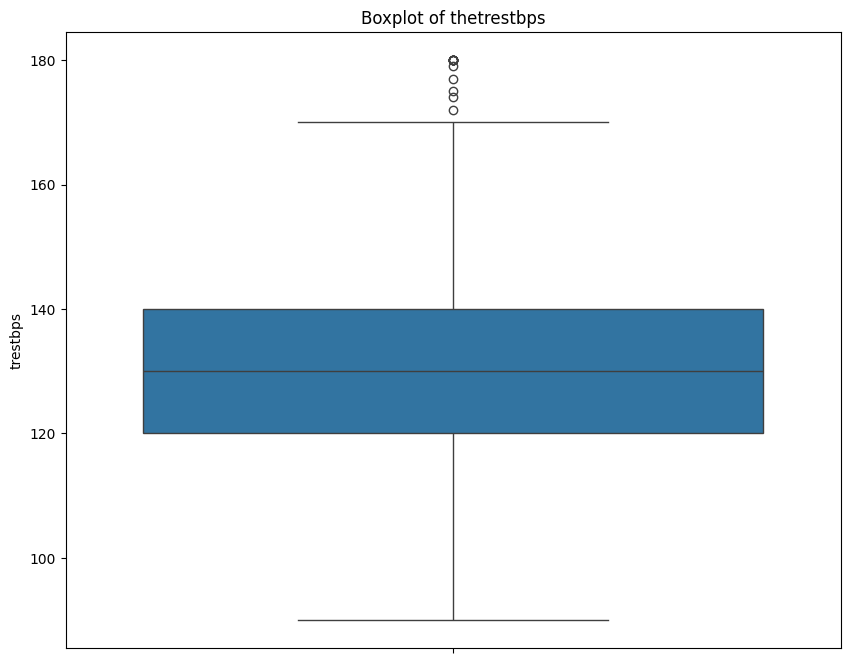

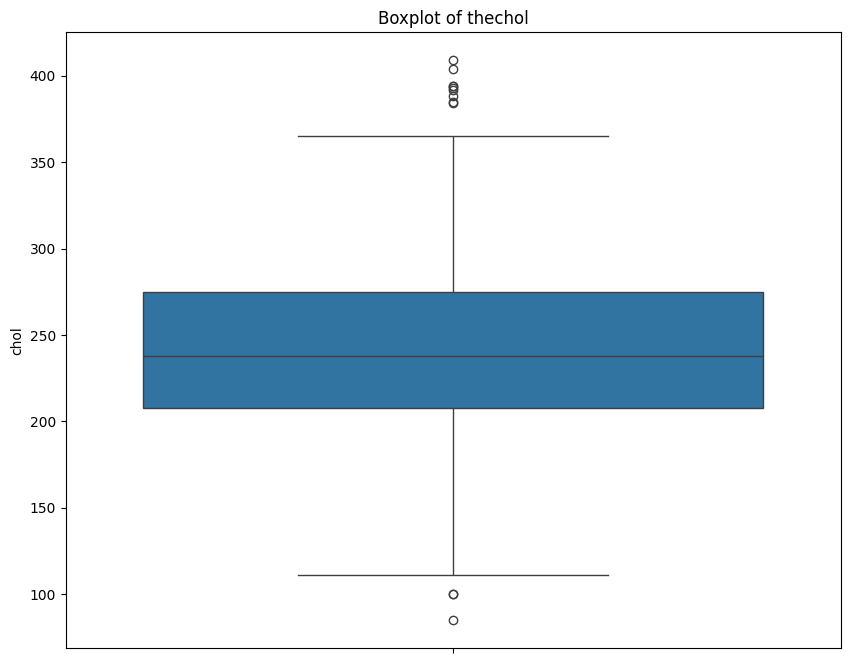

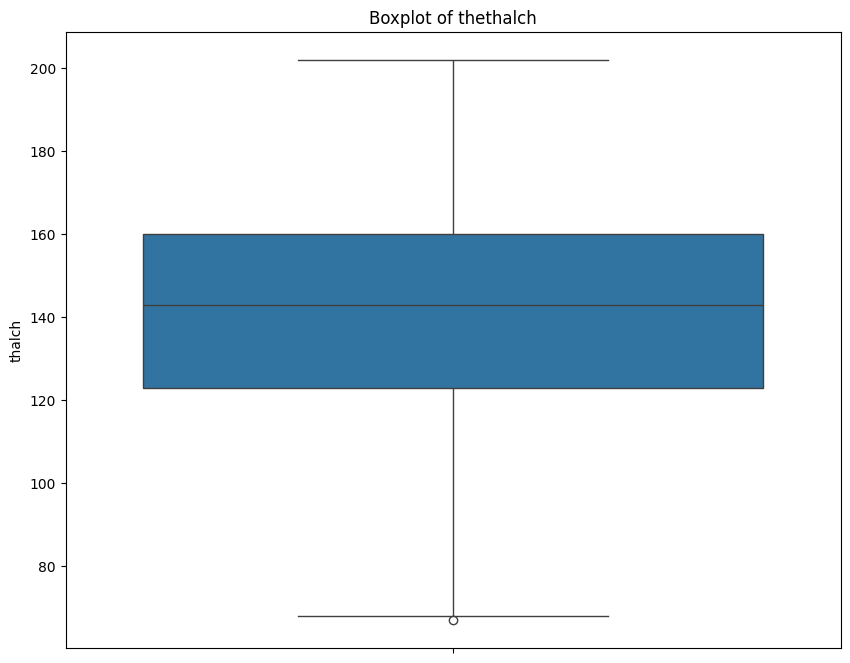

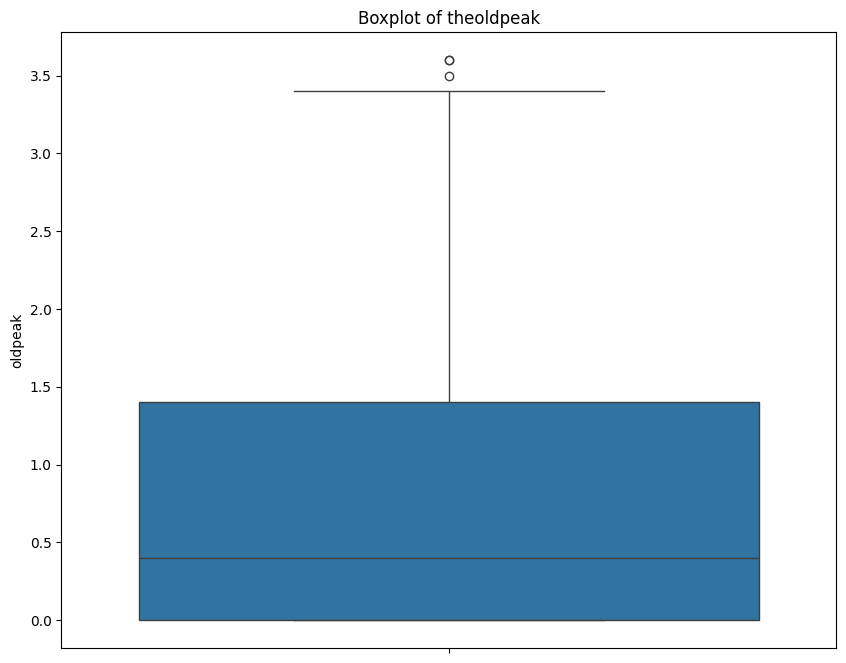

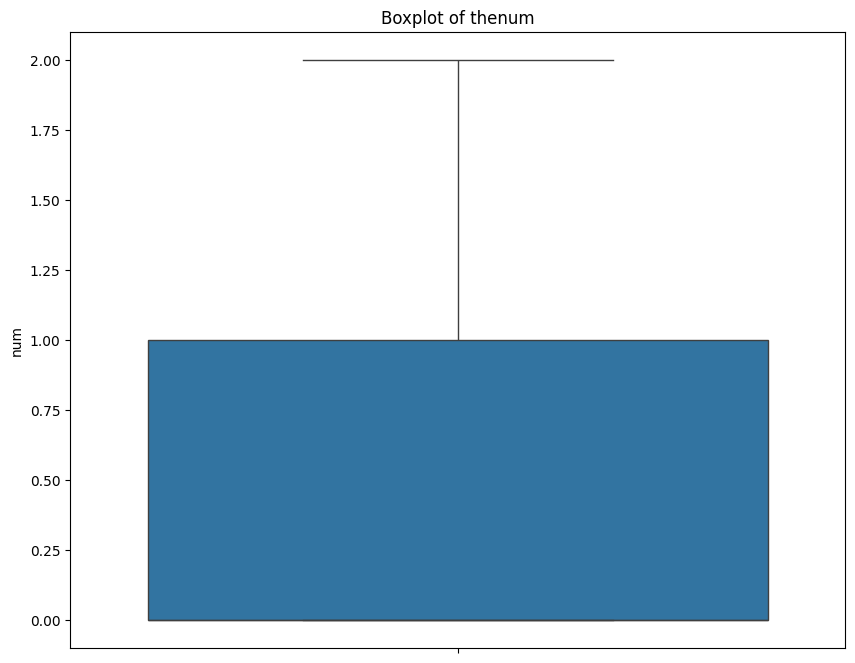

In [45]:
#visualizing the boxplot for given dataset
for col in df_heart_no_outliers.select_dtypes(include=np.number):
  plt.figure(figsize=(10,8))
  plt.title("Boxplot of the"+ col)
  plt.xlabel="Frequency"
  plt.ylabel="values"
  sns.boxplot(df_heart_no_outliers[col])
  plt.show()

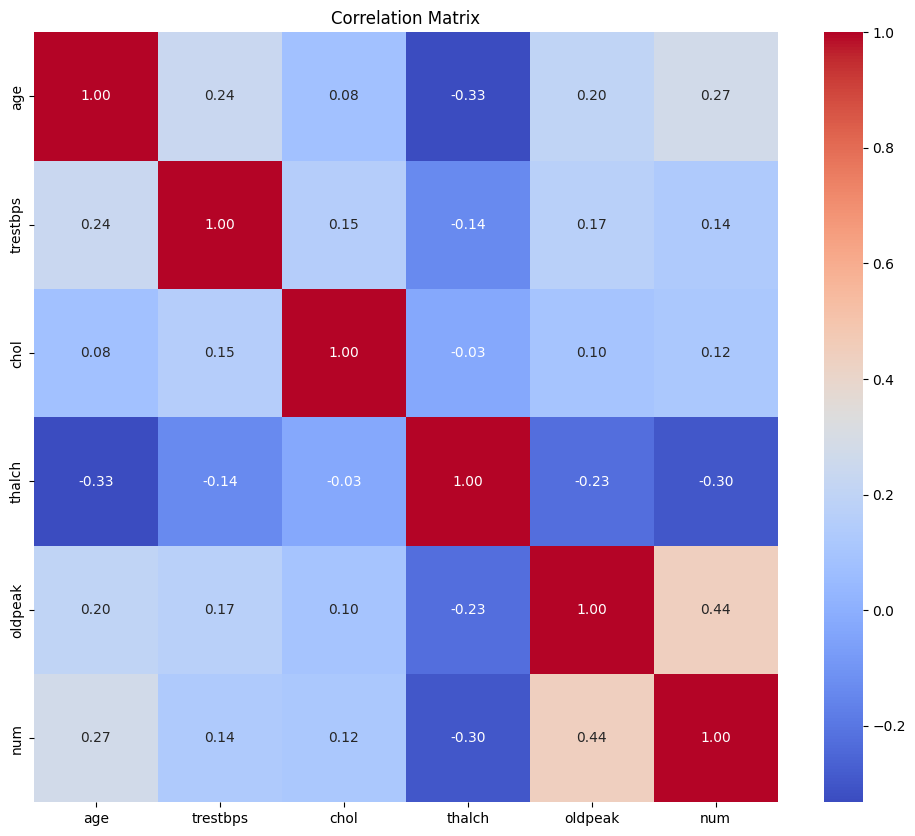

In [46]:
#visualizating the correlation_matrix

correlation_matrix = df_heart_no_outliers.select_dtypes(include=np.number).corr()# Select only numerical columns
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


**3.Feature Engineering**

In [47]:
#Encoding the catagorical columns into numerical columns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 1. Identify categorical features
categorical_features = [ 'sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# 2. Convert columns with mixed types to string type
for col in categorical_features:
    df_heart_no_outliers[col] = df_heart_no_outliers[col].astype(str)  # Convert to string

# 3. Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output

# 4. Fit and transform the encoder on your categorical features
encoded_data = encoder.fit_transform(df_heart_no_outliers[categorical_features])

# 5. Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# 6. Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df_heart_no_outliers, encoded_df], axis=1)

# 6. Drop the original categorical features (optional)
df_encoded = df_encoded.drop(categorical_features, axis=1)
df_encoded

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_FALSE,exang_False,exang_TURE,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63.0,145.0,233.0,150.0,2.3,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41.0,135.0,203.0,132.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,57.0,140.0,192.0,148.0,0.4,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,52.0,118.0,186.0,190.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,57.0,110.0,201.0,126.0,1.5,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
611,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
612,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [48]:
df_encoded.dtypes

,0
age,float64
trestbps,float64
chol,float64
thalch,float64
oldpeak,float64
num,float64
sex_Female,float64
sex_Male,float64
cp_asymptomatic,float64
cp_atypical angina,float64


In [49]:
#standazing the values
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the numerical features to scale
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Fit the scaler on the selected features and transform the data

df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

**4.Decision Tree Classifier**

In [50]:

#spliting of the dataset into train and test
from sklearn.model_selection import train_test_split

# DecisionTreeRegressor for continuous targets
from sklearn.tree import DecisionTreeRegressor

# Define your features (X) and target (y)
X = df_encoded.drop('age', axis=1)  # Features (all columns except 'age')
y = df_encoded['age']  # Target variable

#droping 'NAN' from the age column
df_encoded.dropna(subset=['age'], inplace=True)


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('age', axis=1), df_encoded['age'], test_size=0.2, random_state=42)

model = DecisionTreeRegressor() # Create a DecisionTreeRegressor object
model.fit(X_train, y_train) # Train the model using the training data

DecisionTreeRegressor()

In [51]:
#spliting of the dataset into train and test
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = df_encoded.drop('age', axis=1)  # Features (all columns except 'age')
y = df_encoded['age']  # Target variable

#droping 'NAN' from the age column
df_encoded.dropna(subset=['age'], inplace=True)


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('age', axis=1), df_encoded['age'], test_size=0.2, random_state=42)




In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics for regression
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)  # Use np.sqrt to calculate RMSE

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.04952978285313745
Root Mean Squared Error (RMSE): 0.2225528765330555
Mean Absolute Error (MAE): 0.17518874399450923
R-squared (R2): -0.46654927121835543


**5.Hyperparameter Tuning**

In [57]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with appropriate criteria for regression
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
}

# Create GridSearchCV object with appropriate scoring for regression
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [58]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_split': 15}


In [60]:
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
best_model = DecisionTreeRegressor(**best_params) # Change to DecisionTreeRegressor
best_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      min_samples_split=15)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = best_model.predict(X_test)

# Calculate evaluation metrics for regression
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation

**6.Model Evaluation and Analysis**

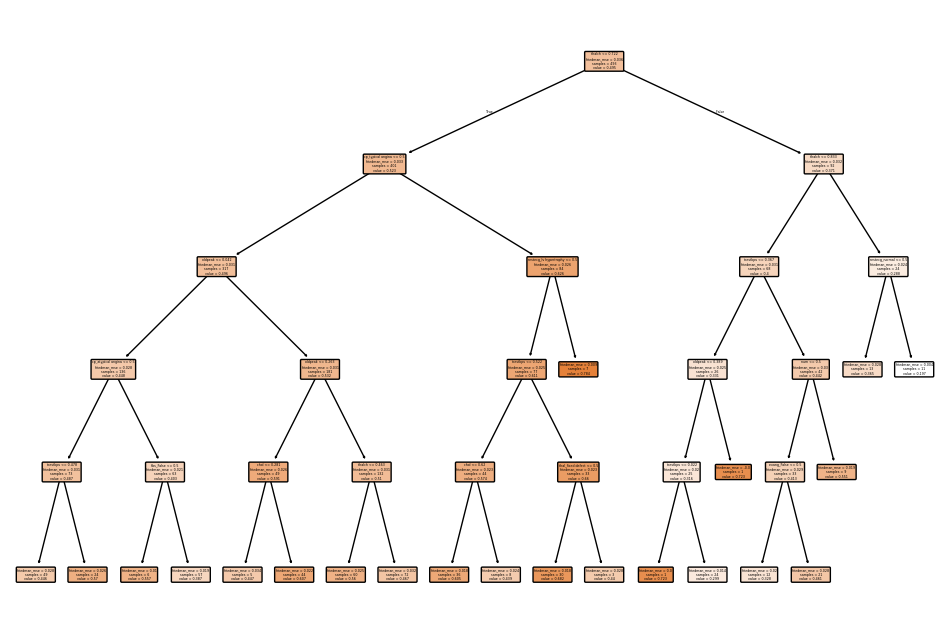

In [64]:
from sklearn.tree import plot_tree

# Get unique values from the target variable (y)
class_names = [str(val) for val in np.unique(y)]

plt.figure(figsize=(12, 8))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=class_names,  # Use derived class names
    filled=True,
    rounded=True,
)
plt.show()

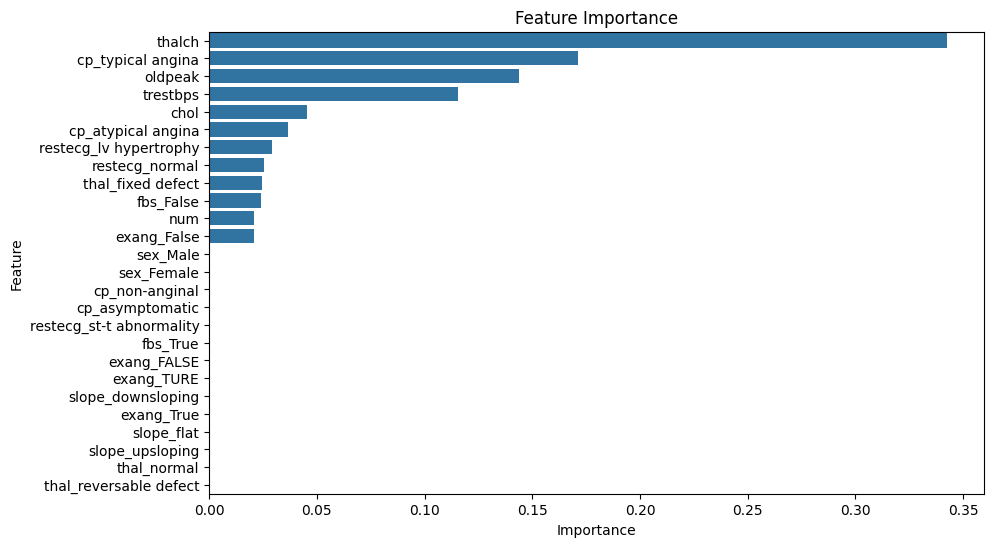

In [65]:
feature_importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common Hyperparameters:

1.criterion: This determines how the decision tree measures the quality of a split. Common options are "gini" for Gini impurity and "entropy" for information gain. Choosing the right criterion can impact how well the tree separates different classes.


2.max_depth: This limits the maximum depth (number of levels) of the decision tree. A deeper tree can capture more complex relationships but is also more prone to overfitting. Limiting the depth helps control overfitting and improves generalization.


3.min_samples_split: This sets the minimum number of samples required to split an internal node. Increasing this value can prevent the tree from creating splits on small, potentially noisy subsets of data, reducing overfitting.


4.min_samples_leaf: This specifies the minimum number of samples required to be at a leaf node (terminal node). Similar to min_samples_split, it helps control overfitting by ensuring that leaf nodes represent a sufficient number of samples.

5.max_features: This limits the number of features considered when looking for the best split. Using a subset of features can make the tree more robust and reduce overfitting, especially when dealing with high-dimensional data.


How Hyperparameters Affect Performance:

Overfitting vs. Underfitting: Hyperparameters like max_depth, min_samples_split, and min_samples_leaf play a crucial role in controlling overfitting. If these values are too low, the tree might underfit and not capture the underlying patterns in the data. If they are too high, the tree might overfit and memorize the training data too well, performing poorly on unseen data.


Complexity: max_depth directly influences the complexity of the tree. A deeper tree is more complex and can capture finer details, but it also increases the risk of overfitting.


Computational Cost: The choice of hyperparameters can affect the computational cost of building and using the decision tree. For example, a deeper tree with more splits will generally take longer to train and predict.


Accuracy and Generalization: Finding the optimal hyperparameter values is crucial for achieving good accuracy on both the training and testing data. Properly tuned hyperparameters help the model generalize well to unseen data and avoid overfitting.


2.What is the difference between the Label encoding and One-hot encoding?

Label Encoding:

What it does: Assigns a unique numerical label to each category in a categorical feature. For example, if you have a feature called "color" with categories "red," "green," and "blue," Label Encoding might assign 0 to "red," 1 to "green," and 2 to "blue."

One-Hot Encoding:

What it does: Creates new binary features (0 or 1) for each category in a categorical feature. Each category gets its own feature, and a value of 1 indicates the presence of that category for a given data point.
